<html>
    <div style="color:#363945; background-color:#E1F6FF; display: block">
        <h1> Data Analytics - Notebook Summary </h1>
            <ol>
                <li>Perform <strong>One-Hot Encoding</strong> to Categorical Values (Skills - Jobs) in order to perform analysis.</li>
                <li>
                    Perform <strong>Skills Analysis</strong> including: 
                    <ul>
                        <li>What is the frequency of each skill ?</li>
                        <li>How are different skills correlated to each other ?</li>
                    </ul> 
                </li>
                <li>
                    Perform <strong>Jobs Analysis</strong> including: 
                    <ul>
                        <li>What is the frequency of each role ?</li>
                        <li>How are different roles correlated to each other ? </li>
                    </ul>
                </li>
                <li>
                    Explore the <strong>Correlation</strong> between different jobs and skills. 
                    <ul>
                        <li>Is Python important to be a Front-End Developer ?</li>
                        <li>Is C++ important to be a data scientist ?</li>
                        <li>Is Javascript important to be a data analyst ?</li>
                    </ul> 
                </li>
                <li><strong>Normalize</strong> features and notice the effect of standardization.</li>
                <li>Exploring various <strong>job profiles</strong> and figuring their related skillset in terms of <strong>percentage</strong> and <strong>specificity</strong>.</li>
            </ol><br>
    </div>
</html>

In [1]:
# CONSTANTS
DF_PATH = "C:/Users/Rami/Projects/IT_Educational_Institute_Data_Analysis/data/processed/01_preprocessed.pkl"
ROLES_PATH = "C:/Users/Rami/Projects/IT_Educational_Institute_Data_Analysis/data/raw/roles_short_names.csv"

# Technologies worked with
TECH_COLS = ['DatabaseWorkedWith', 'LanguageWorkedWith', 'MiscTechWorkedWith', 
             'NEWCollabToolsWorkedWith', 'PlatformWorkedWith', 'WebframeWorkedWith']

# Desired technologies to work with
NEXT_TECH_COLS = ['DatabaseDesireNextYear', 'LanguageDesireNextYear', 'MiscTechDesireNextYear', 
                  'NEWCollabToolsDesireNextYear', 'PlatformDesireNextYear', 'WebframeDesireNextYear']
# Job Titles
ROLE_COLS = ['DevType']

In [2]:
import numpy as np
import pandas as pd
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MultiLabelBinarizer

import matplotlib.pyplot as plt
import plotly 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
# import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode,  iplot
init_notebook_mode(connected=True)
# Set renderer default --> Where the plot should be displayed ?
# Used i_frame_connected to display inside the notebook
pio.renderers.default = 'iframe_connected'

## Reading and processing data

In [3]:
raw_data = pd.read_pickle(DF_PATH)
raw_data.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13.0,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",[ASP.NET Core],"[ASP.NET, ASP.NET Core]",Just as welcome now as I felt last year,50.0,36.0,27.0
1,2,I am a developer by profession,No,NaN,19.0,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",[],[],Somewhat more welcome now than last year,NaN,7.0,4.0
2,3,I code primarily as a hobby,Yes,NaN,15.0,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,[],[],Somewhat more welcome now than last year,NaN,4.0,NaN
3,4,I am a developer by profession,Yes,25.0,18.0,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",[],[],Somewhat less welcome now than last year,40.0,7.0,4.0
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16.0,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...","[Django, Ruby on Rails]",[Ruby on Rails],Just as welcome now as I felt last year,NaN,15.0,8.0


### 1. Perform One-Hot Encoding to technologies and jobs columns

### Functions

In [4]:
def binarize_data(dataframe, col_names):
    """
    Function to apply One-Hot Encoding (Binarization) to specified list
    of columns in a dataframe and returns a dictionary.
    
    Input:
    dataframe: A Pandas dataframe that contains target columns.
    col_names: A list consisting of column names inside dataframe to apply One-Hot-Encoding.
    
    Returns:
    A dictionary consisting of {Column_name: Encoded_DataFrame}
    """

    # Check if any of the columns does not exist in the dataframe
    # If found: Return an Error Message
    for col in col_names:
        if col not in dataframe:
            return {'Error: {} column does not exist in the specified dataframe'.format(col)}
    
    encoded_dataframes = {}
    
    # Creating Binarizer Object
    mlb = MultiLabelBinarizer()
    
    for col in col_names:
        # Encode each column in the list
        encoded_df = pd.DataFrame(data= mlb.fit_transform(dataframe[col]),
                                  columns= mlb.classes_, 
                                  index= dataframe[col].index)
        
        # Add encoded dataframe to the dictionary
        encoded_dataframes[col] = encoded_df
    
    return encoded_dataframes

## Skills Analysis
### 1. Frequency of different skills

In [5]:
df = raw_data.copy()

# Drop Job Column
df.drop('DevType', axis= 1, inplace= True)

# Get encoded skills
skills = binarize_data(df, TECH_COLS) 

# Merge 1-hot encoded 
skills_df = pd.concat(skills, axis=1)

# Calculate the sum for all the skills [all cols except DevType]
skills_freq = skills_df.sum(axis=0).reset_index()
skills_freq.columns = ['Group', 'Skill', 'Frequency']

In [6]:
skills_freq

,Group,Skill,Frequency
0,DatabaseWorkedWith,Cassandra,1654
1,DatabaseWorkedWith,Couchbase,937
2,DatabaseWorkedWith,DynamoDB,3497
3,DatabaseWorkedWith,Elasticsearch,6817
4,DatabaseWorkedWith,Firebase,7128
...,...,...,...
96,WebframeWorkedWith,Ruby on Rails,2944
97,WebframeWorkedWith,Spring,6941
98,WebframeWorkedWith,Symfony,1851
99,WebframeWorkedWith,Vue.js,7322


In [7]:
# Visualize different skills frequencies
data = px.treemap(skills_freq, 
                 path=['Group', 'Skill'], 
                 color_continuous_scale='deep',
                 values='Frequency',
                 color='Frequency')

fig = go.Figure(data=data)
fig.update_layout(width=1100, height=650)
iplot(fig)

## Jobs Analysis
### 1. Frequency of different roles

In [8]:
df = raw_data.copy()

# Drop Skills Columns
skills_cols = TECH_COLS + NEXT_TECH_COLS
df.drop(columns= skills_cols, axis= 1, inplace= True)

# Get encoded jobs
jobs = binarize_data(df, ROLE_COLS) 

# Merge 1-hot encoded 
jobs_df = pd.concat(jobs, axis=1)

# Calculate the sum for all the jobs [all cols except TECH columns]
jobs_freq = jobs_df.sum(axis=0).reset_index()
jobs_freq.columns = ['Group', 'Job', 'Frequency']

In [9]:
jobs_freq

,Group,Job,Frequency
0,DevType,Academic researcher,3552
1,DevType,Data or business analyst,4024
2,DevType,Data scientist or machine learning specialist,3988
3,DevType,Database administrator,5722
4,DevType,Designer,5321
5,DevType,DevOps specialist,5969
6,DevType,"Developer, QA or test",3947
7,DevType,"Developer, back-end",27228
8,DevType,"Developer, desktop or enterprise applications",11784
9,DevType,"Developer, embedded applications or devices",4750


In [10]:
# Visualize different jobs frequencies 
data = px.treemap(jobs_freq, 
                 path=['Group', 'Job'], 
                 color_continuous_scale='deep',
                 values='Frequency',
                 color='Frequency')

fig = go.Figure(data=data)
fig.update_layout(width=1100, height=700)
iplot(fig)

## Correlation between different jobs and skills

In [11]:
# Sort Roles and skills by frequency in descending order
sorted_roles = jobs_df['DevType'].sum().sort_values().index.tolist()
sorted_skills = skills_df.sum().sort_values(ascending=False).droplevel(level=0).index.tolist()

# Combine different skills and jobs in a single dataframe
skills = []
for role in sorted_roles:
    role_mask = (jobs_df[('DevType', role)] == 1)    # Get role mask for each job profile across different responses (rows)
    
    # Search the skills dataframe for a matching job mask 
    # Get the mean value (Percentage) of different skill (Indication of how much that skill occurs in the corresponding job profile) 
    # Build a dictionary {KEY [skills (tech_col)]: VALUES [Pandas Series that contains mean tech_col (skill) for that specific role)}.
    # Append Series to list of skills
    skills_roles = pd.concat({tech_col: skills_df.loc[role_mask, tech_col].mean() * 100 
                              for tech_col in TECH_COLS})  
    
    skills.append(skills_roles)

# Convert list to a dataframe [Rows: Technologies, Columns: Role Name]
skills_jobs = pd.concat(skills, axis=1)

# Set column names to job roles 
skills_jobs.columns = sorted_roles

# Drop different grouping indeces to get only skills (EX: DataBaseWorkedWith - LanguageWorkedWith...)
skills_jobs = skills_jobs.reset_index(level=0, drop=True)

# Sort skills_jobs by most occuring technologies (Descending)
skills_jobs = skills_jobs.loc[sorted_skills]
skills_jobs

,Marketing or sales professional,Senior executive/VP,"Engineer, site reliability",Scientist,Product manager,Engineering manager,"Developer, game or graphics",Educator,Academic researcher,"Engineer, data",...,"Developer, embedded applications or devices",System administrator,Designer,Database administrator,DevOps specialist,"Developer, mobile","Developer, desktop or enterprise applications","Developer, front-end","Developer, full-stack","Developer, back-end"
Github,70.872274,75.075758,79.845361,77.756472,75.090108,75.991189,79.455002,78.278689,77.730856,75.307651,...,72.968421,73.636017,72.486375,71.268787,77.734964,77.747311,69.730143,75.726935,75.395392,74.294844
JavaScript,71.028037,72.878788,65.876289,48.465964,73.007609,69.346549,67.228397,68.408470,54.194820,56.902087,...,58.378947,71.041587,75.981958,74.274729,70.296532,66.642059,65.699253,84.012899,81.990783,69.391803
HTML/CSS,76.635514,69.166667,58.505155,47.027804,69.603524,60.682819,62.459663,66.803279,53.462838,52.594971,...,54.105263,69.496375,74.873144,73.068857,62.707321,60.693946,61.311948,78.312199,73.784332,61.389011
SQL,57.788162,65.075758,61.701031,43.672100,63.115739,60.425844,49.264970,56.625683,46.706081,67.174960,...,49.557895,68.141931,58.804736,80.076896,63.059139,50.284750,62.024779,56.394840,62.046083,61.374321
Linux,42.367601,58.863636,74.639175,67.162033,53.664397,61.600587,52.922194,56.933060,62.190315,62.841091,...,63.494737,70.679130,44.747228,56.833275,70.748869,40.392322,49.456891,45.419764,51.181567,55.769796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Puppet,4.517134,4.848485,9.278351,2.301055,3.003604,4.515419,2.402295,2.834699,2.111486,2.808989,...,2.168421,5.036246,2.161248,2.901084,5.712850,1.497574,1.756619,1.579580,1.725346,1.986925
Couchbase,6.230530,5.227273,3.659794,3.259827,3.123748,4.001468,3.011832,2.766393,2.505631,3.504548,...,2.800000,2.689813,2.236422,2.638937,3.534930,2.309639,2.197895,1.841933,1.994470,2.060379
IBM Cloud or Watson,7.476636,5.000000,3.298969,3.978907,2.803364,2.790015,2.294729,2.698087,3.350225,3.263777,...,2.378947,2.251049,2.123661,2.114645,2.445971,1.813963,1.451120,1.426541,1.448848,1.432349
Chef,4.672897,3.939394,8.041237,2.157239,2.643172,4.331865,2.007888,2.288251,1.520270,2.354200,...,1.831579,3.586417,1.541064,2.271933,5.277266,1.065176,1.298371,1.043944,1.441475,1.604965


### Visualizing Heatmap

In [12]:
# Transpose skills_jobs 
skills_jobs = skills_jobs.T

# Build Heatmap figure
data=go.Heatmap(z=skills_jobs, x=skills_jobs.columns, 
                y=skills_jobs.index, colorscale='magma', ygap=1)
# Plot
fig = go.Figure(data=data)
fig.update_layout(width=1300, height=800)
iplot(fig)

### Create Jobs Dendogram

In [13]:
# Read shorter role names file
roles_names = pd.read_csv(ROLES_PATH)
roles_names.head()

,Original name,Short name
0,"Developer, back-end",Back-end dev
1,"Developer, full-stack",Full-stack dev
2,"Developer, front-end",Front-end dev
3,"Developer, desktop or enterprise applications",Desktop dev
4,"Developer, mobile",Mobile dev


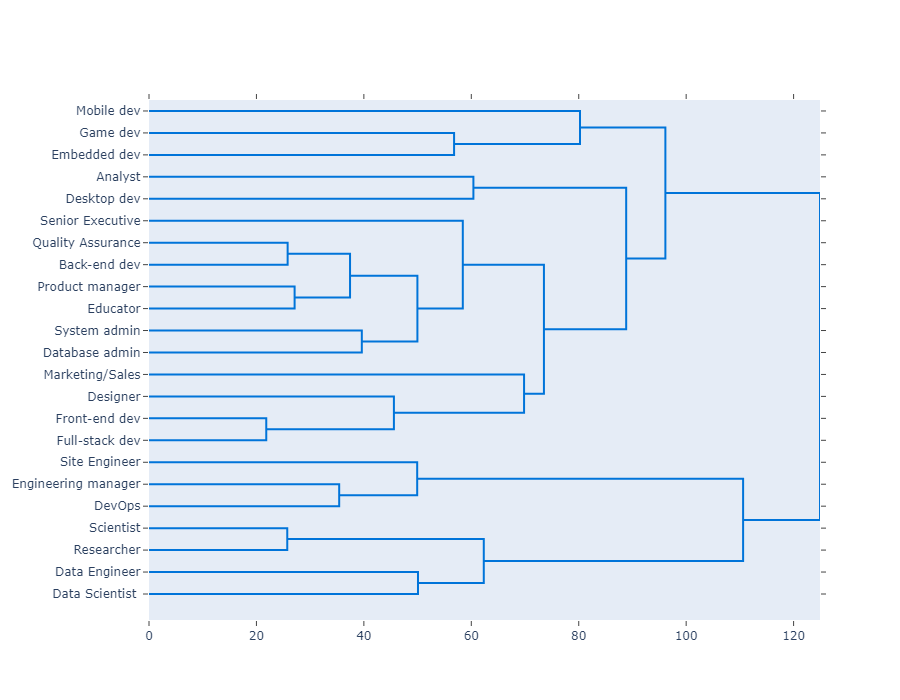

In [14]:
# Build a dictionary to replace column names with shorter versions
roles_short_dict = roles_names.set_index('Original name')["Short name "].to_dict()
short_labels = [roles_short_dict[role] 
                for role in sorted_roles]

fig = ff.create_dendrogram(skills_jobs, labels=short_labels, 
                           orientation='left', color_threshold=0)

fig.update_layout(height=700, width=900, showlegend=False) 
fig.show("png")

<h3> Insights From The Above Dendogram </h3>
    <ol>
        <li>Data Scientist ---> Data Engineer.</li>
        <li>Researcher --->  Scientist.</li>
        <li>Full Stack Developer --->  Front-End Developer.</li>
        <li>System Admin --->  Database Admin.</li>
    </ol>
    
<h5 > What about Back-End Developer, Is it in the right category? </h5>


## Normalize Features

In [15]:
std_skills_jobs = StandardScaler().fit_transform(skills_jobs)
std_skills_jobs = pd.DataFrame(std_skills_jobs, columns=skills_jobs.columns, index=skills_jobs.index)

In [16]:
# Build Heatmap figure
data=go.Heatmap(z=std_skills_jobs, x=skills_jobs.columns, 
                y=skills_jobs.index, colorscale='magma', ygap=1)
# Plot
fig = go.Figure(data=data)
fig.update_layout(width=1300, height=800)
iplot(fig)

### Insights From The Above Heatmap
1. After Normalization, We can see that __Unity3D__, __Unreal Engine__ are very specific skills related to a __Game Developer__.
2. We can also notice that __Facebook Workplace__, __WordPress__, __Drupal__ are specific skills to be a __Marketing or sales professional__.
3. To be a __Data Scientist__, some of the skills you must have include __Pandas__, __Tensorflow__, __Keras__, __Torch - Pytorch.__
4. __Back-End Developer__ has no specific set of skills it shares skills with many other job profiles.

## Job Profiles

In [17]:
sorted_roles

['Marketing or sales professional',
 'Senior executive/VP',
 'Engineer, site reliability',
 'Scientist',
 'Product manager',
 'Engineering manager',
 'Developer, game or graphics',
 'Educator',
 'Academic researcher',
 'Engineer, data',
 'Developer, QA or test',
 'Data scientist or machine learning specialist',
 'Data or business analyst',
 'Developer, embedded applications or devices',
 'System administrator',
 'Designer',
 'Database administrator',
 'DevOps specialist',
 'Developer, mobile',
 'Developer, desktop or enterprise applications',
 'Developer, front-end',
 'Developer, full-stack',
 'Developer, back-end']

In [18]:
# role = np.random.choice(sorted_roles)  # Random Choice
role = 'Data scientist or machine learning specialist'
role

'Data scientist or machine learning specialist'

In [19]:
# DF for a single job profile and corresponding skills
single_role_skills = pd.concat([skills_jobs.loc[role], std_skills_jobs.loc[role]], axis=1)
single_role_skills.columns = ['percentage', 'specificity']
single_role_skills = single_role_skills.sort_values('percentage')
single_role_skills

,percentage,specificity
Chef,2.081244,-0.366560
Couchbase,2.357071,-0.627059
Puppet,2.432297,-0.425910
Gatsby,2.683049,-0.732300
Unreal Engine,2.758275,-0.330042
...,...,...
Slack,51.078235,0.167600
SQL,58.450351,-0.180472
Linux,63.540622,0.720565
Github,78.059178,0.967076


#### Note 
- __Percentage:__ The __number of people__ who knows a specific skill in a job profile.
- __Specifity:__ This is an indicator of __how specific__ a certain skill is to a job profile.

In [20]:
# Set percentage Threshold
threshold = 10

single_role_skills = single_role_skills[single_role_skills['percentage'] > threshold]

fig = px.bar(df, 
             y=single_role_skills.index, 
             x=single_role_skills['percentage'], 
             color=single_role_skills['specificity'], 
             color_continuous_scale='orrd',
             range_color=[std_skills_jobs.values.min(),std_skills_jobs.values.max()],
             orientation='h')

fig.update_layout(width=1000, height=1000, title=role)
iplot(fig)

### Insights From The Above Barplot
- Python is a well known language by a large number of data scientists __(78%)__ but the specifity of Python __(2.61)__ is not greater than Pandas' specifity to be a data scientist __(3.29)__.
- This is reasonable because not all data scientists uses pandas in their work, there exist some people using R, Pandas is used by __50%__ of data scientists.
- There could be many more useful insight based on the chosen Role.